In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, '$u(r/\\sigma)/(k_B T_{298 K})$')

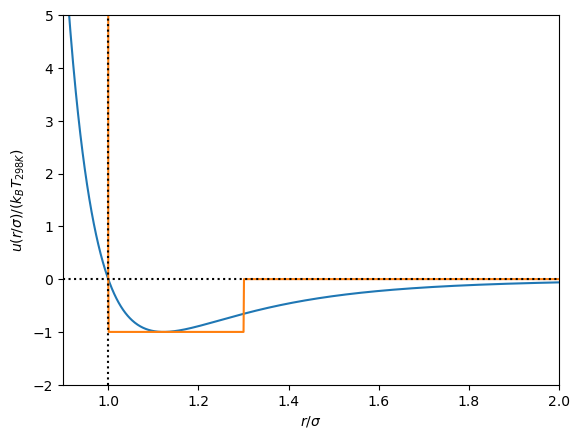

In [2]:
sigma = 1.
epsi = 1.
kB = 1.380649e-23

#figure(figsize=(3.375,3.375),dpi=1200)  # One column figure
#€color = '0.75'
#test = plt.subplot(111)

x = np.linspace(0.001,5,5000)

def LJ(xx):
  rr6 = pow(xx/sigma,-6)
  rr12 = pow(xx/sigma,-12)
  return 4.*epsi*(rr12-rr6)*298.

def SQP(xx):
#  print(1.*(xx > 1))
  return (-1.*(xx > 1)+1.*(xx>1.3)+1e4*(xx<1))*298.
    
def HS(xx):
#  print(1.*(xx > 1))
  return 1e4*(xx<1)*298.

plt.plot(x,LJ(x)/298.)
plt.plot(x,SQP(x)/298)
#plt.plot(x,HS(x)/298)

plt.axhline(0,ls=':',c='k')
plt.axvline(1,ls=':',c='k')
#plt.axhline(-1,ls=':',c='r')
plt.ylim([-2,5.])
plt.xlim([0.9,2.])
plt.xlabel('$r/\sigma$')
plt.ylabel('$u(r/\sigma)/(k_B T_{298 K})$')

Text(0, 0.5, '$B_2/B_2^{HS}$')

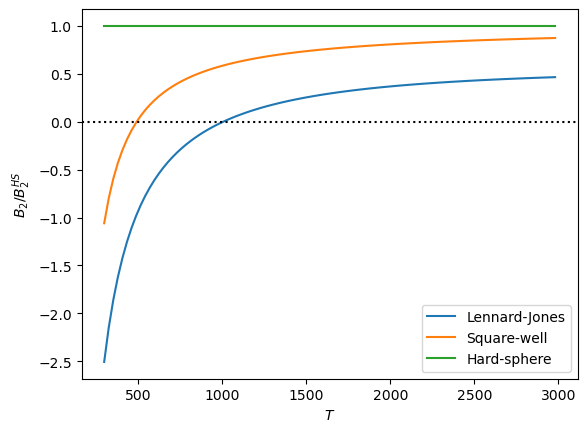

In [3]:
Tin = np.linspace(298.,2980.,100)

dx = x[1]-x[0]
def B2(xx,T):
  return -2.*np.pi*(np.exp(-LJ(xx)/T)-1)*xx*xx*dx

def B2sqw(xx,T):
  return -2.*np.pi*(np.exp(-SQP(xx)/T)-1)*xx*xx*dx

def B2hs(xx,T):
  return -2.*np.pi*(np.exp(-HS(xx)/T)-1)*xx*xx*dx

def B2int(xx,TT):
  b2 = []
  for i in TT:
#    print(i,np.sum(B2(x,i)))
    b2.append(np.sum(B2(x,i)))
  return np.asarray(b2)

def B2int_sqw(xx,TT):
  b2 = []
  for i in TT:
#    print(i,np.sum(B2(x,i)))
    b2.append(np.sum(B2sqw(x,i)))
  return np.asarray(b2)

def B2int_hs(xx,TT):
  b2 = []
  for i in TT:
#    print(i,np.sum(B2(x,i)))
    b2.append(np.sum(B2hs(x,i)))
  return np.asarray(b2)

B2_hs_theory = 2.*np.pi/3.*pow(1.,3)

plt.plot(Tin,B2int(x,Tin)/B2_hs_theory,label='Lennard-Jones')
plt.plot(Tin,B2int_sqw(x,Tin)/B2_hs_theory,label='Square-well')
#plt.plot(Tin,np.asarray(B2int(x,Tin))/np.asarray(B2int_hs(x,Tin)))
plt.plot(Tin,B2int_hs(x,Tin)/B2_hs_theory,label='Hard-sphere')
plt.legend()
plt.axhline(0,ls=':',c='k')
plt.xlabel('$T$')
plt.ylabel('$B_2/B_2^{HS}$')